# Week 1: Day 4 AM // SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc,roc_auc_score
import time
import pandas as pd

%matplotlib inline

In [ ]:
# Calculate coefficients
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]

In [ ]:
X = []
y=[]
for i in dataset:
  X.append(i[0:2])
  y.append(i[2])
X=np.array(X)
y=np.array(y)

In [ ]:
X

array([[ 2.7810836 ,  2.550537  ],
       [ 1.46548937,  2.36212508],
       [ 3.39656169,  4.40029353],
       [ 1.38807019,  1.85022032],
       [ 3.06407232,  3.00530597],
       [ 7.62753121,  2.75926224],
       [ 5.33244125,  2.08862677],
       [ 6.92259672,  1.77106367],
       [ 8.67541865, -0.24206865],
       [ 7.67375647,  3.50856301]])

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(gamma='auto',probability=True,kernel='linear')
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

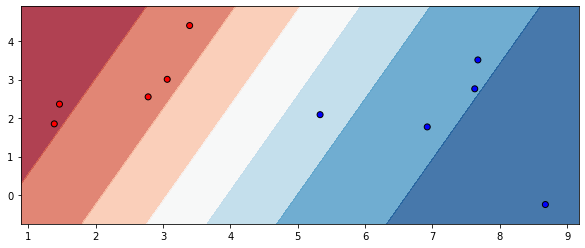

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,4))
h = .02  # step size in the mesh
# just plot the dataset first
cm = plt.cm.RdBu 
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
#ax.scatter(X[:, 0], X[:,1], c=y, cmap=cm_bright,edgecolors='k')

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = []
for i in np.c_[xx.ravel(), yy.ravel()]:
  Z.append(clf.predict_proba(i.reshape(1, -1))[0][1])

Z = np.array(Z)
#Z = np.clip((Z-Z_min)/(Z_max-Z_min),0,1)
Z = Z.reshape(xx.shape)
#Z = np.abs(0.5-(Z-Z.min())/(Z.max()-Z.min()))
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
              edgecolors='k')
plt.show()

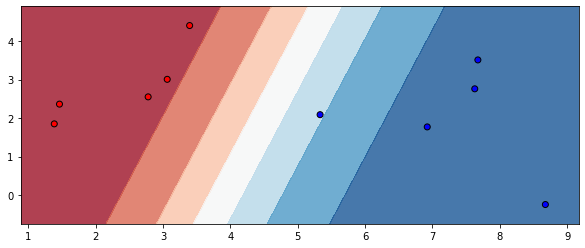

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)

fig,ax = plt.subplots(1,1,figsize=(10,4))
h = .02  # step size in the mesh
# just plot the dataset first
cm = plt.cm.RdBu 
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
#ax.scatter(X[:, 0], X[:,1], c=y, cmap=cm_bright,edgecolors='k')

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = []
for i in np.c_[xx.ravel(), yy.ravel()]:
  Z.append(clf.predict_proba(i.reshape(1, -1))[0][1])

Z = np.array(Z)
#Z = np.clip((Z-Z_min)/(Z_max-Z_min),0,1)
Z = Z.reshape(xx.shape)
#Z = np.abs(0.5-(Z-Z.min())/(Z.max()-Z.min()))
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
              edgecolors='k')
plt.show()

## Sensitivity to Outlier

In [ ]:
# Calculate coefficients
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1],
  [6.675418651,1.242068655,0]]

In [ ]:
X = []
y=[]
for i in dataset:
  X.append(i[0:2])
  y.append(i[2])
X=np.array(X)
y=np.array(y)

In [ ]:
X

array([[ 2.7810836 ,  2.550537  ],
       [ 1.46548937,  2.36212508],
       [ 3.39656169,  4.40029353],
       [ 1.38807019,  1.85022032],
       [ 3.06407232,  3.00530597],
       [ 7.62753121,  2.75926224],
       [ 5.33244125,  2.08862677],
       [ 6.92259672,  1.77106367],
       [ 8.67541865, -0.24206865],
       [ 7.67375647,  3.50856301],
       [ 6.67541865,  1.24206865]])

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(gamma='auto',probability=True,kernel='linear')
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

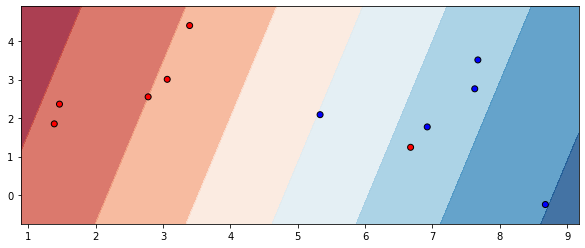

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,4))
h = .02  # step size in the mesh
# just plot the dataset first
cm = plt.cm.RdBu 
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
#ax.scatter(X[:, 0], X[:,1], c=y, cmap=cm_bright,edgecolors='k')

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = []
for i in np.c_[xx.ravel(), yy.ravel()]:
  Z.append(clf.predict_proba(i.reshape(1, -1))[0][1])

Z = np.array(Z)
#Z = np.clip((Z-Z_min)/(Z_max-Z_min),0,1)
Z = Z.reshape(xx.shape)
#Z = np.abs(0.5-(Z-Z.min())/(Z.max()-Z.min()))
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
              edgecolors='k')
plt.show()

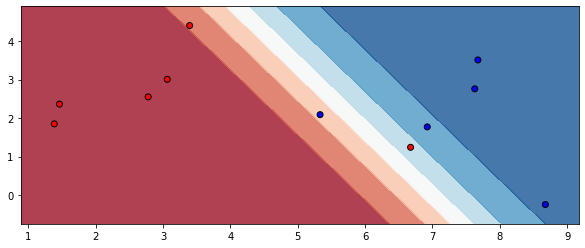

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='none')
clf.fit(X, y)

fig,ax = plt.subplots(1,1,figsize=(10,4))
h = .02  # step size in the mesh
# just plot the dataset first
cm = plt.cm.RdBu 
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
#ax.scatter(X[:, 0], X[:,1], c=y, cmap=cm_bright,edgecolors='k')

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = []
for i in np.c_[xx.ravel(), yy.ravel()]:
  Z.append(clf.predict_proba(i.reshape(1, -1))[0][1])

Z = np.array(Z)
#Z = np.clip((Z-Z_min)/(Z_max-Z_min),0,1)
Z = Z.reshape(xx.shape)
#Z = np.abs(0.5-(Z-Z.min())/(Z.max()-Z.min()))
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
              edgecolors='k')
plt.show()

In [ ]:
xx.shape

(283, 415)

In [ ]:
clf.predict_proba(i.reshape(1, -1))[0][0]

0.321791792938165